# Importing Data & Packages

In [1]:
# General purpose libraries
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime

# Deep learning library
import keras 
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from imblearn.over_sampling import SMOTE
import eli5
from eli5.sklearn import PermutationImportance

import shap

print('Everything Imported Succesfully!')

Everything Imported Succesfully!


## importing tha data from a csv file
import with date parsed and indexes set. fix the name of the data time column and fill NaN in batch names with 'no batch specified'

In [2]:
data=pd.read_csv('/kaggle/input/301-330-days/Data_5IAL_3_301.csv',index_col=0,parse_dates=[1])  # Read data
data.rename(columns={'0':'Date'},inplace=True)                                                  # Give date column a descriptive name
data['5IAL_3_301.BatchName']=data['5IAL_3_301.BatchName'].fillna('No Batch Specified')          # Replace batchnames NaN's with 'no batch'
data.head()

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.


,Date,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,...,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.64,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_LSH301.56,5IAL_3_XPV301.13,5IAL_3_WY301.54
0,2022-04-10 12:00:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
1,2022-04-10 12:01:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00106,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
2,2022-04-10 12:02:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00102,2.07,...,0,0,0,0,0,0,1.41,0,0.0,0.0
3,2022-04-10 12:03:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
4,2022-04-10 12:04:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00104,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0


### Batchcode date checker

In [3]:
pd_data=(data['5IAL_3_301.BatchName']=='IU7012228605')

#print(np.sum(pd_data))
#print(pd_data[pd_data].index[0])

print(data['Date'][pd_data[pd_data].index[0]])

2022-10-13 14:47:00


In [4]:
batch_IU=data.loc[data['5IAL_3_301.BatchName'].str.contains("IU", case=False)]
print(batch_IU['5IAL_3_301.BatchName'].unique())

['IU7012218701' 'Na IU7012218701' 'Na IU7012218701 CIP'
 'Na IU7012218701 Demi' 'IU7012218702' 'Na IU7012218702' 'IU7012225501'
 'IU7012225502' 'IU7012225503' 'IU7012225503-1' 'IU7012225504'
 'IU7012225505' 'Na IU7012225501' 'IU7012225601' 'IU7012225602'
 'IU702225603' 'IU702225604' 'IU701222605' 'IU7012225606' 'IU7012225701'
 'IU7012225702' 'IU7012225703' 'IU7012225704' 'IU7012225705'
 'IU7012225706' 'IU7012225707' 'IU7012225708' 'IU7012225709'
 'IU7012225710' 'IU7012225711' 'IU7012225712' 'IU7012225713'
 'IU7012225801' 'IU7012225802' 'IU7012225803' 'IU7012225804'
 'IU7012225805' 'IU7012225806' 'IU7012225807' 'IU7012225808'
 'IU7012225809' 'IU7012225810' 'IU7012225811' 'IU7012225812'
 'IU7012225813-1' 'IU7012225814' 'IU7012225815' 'IU7012225901'
 'Na IU7012225901' 'IU7012228401' 'IU7012228402' 'IU7012228403'
 'IU7012228404' 'IU7012228405' 'IU7012228501' 'IU7012228502'
 'IU7012228503' 'NA IU7012228503' 'IU7012228504' 'IU7012228505'
 'IU7012228506' 'IU7012228507' 'IU7012228508' 'IU70122

# Data Splitting and Grouping 

In [5]:
#give unique batch names
Batch_Names=data['5IAL_3_301.BatchName']
unique_names=Batch_Names.unique()
print(unique_names)

['No Batch Specified' 'YP5812210101' 'YP5812210102' ... 'KB212306501'
 'NA KB212306501' 'KC112306501']


In [6]:
print(unique_names.size)

1629


## Filter out the batches
In this step everything that is not a viable batch is filterd out.\
This way demi cleanings, CIP cleanings and downtime are no longer in the dataset.

In [7]:
#Convert the unique_names numpy array to a pandas series
temp_df=pd.Series(unique_names)

submask_IU=temp_df.str.contains("CGD", case=False) | temp_df.str.contains("IU", case=False)

submask_length=((temp_df.str.len() >= 11) & (temp_df.str.len() <= 12))



# Create a boolean mask to select rows where the length of the specified column is between 11 and 12 characters (inclusive)
mask = ~submask_IU & submask_length

# Use the boolean mask to select only the rows that meet the criteria
Viable_Batches = unique_names[mask]

# filter out batches longer than 6 hours
batches_to_long=['YP5512211802','YD112218501','YP5512219601','YP7012220102','YP5512221603','YP5512223502','KD112223701','MD112228001','KP5812228702','CD112303801']

Viable_Batches=Viable_Batches[~(pd.Series(Viable_Batches).isin(batches_to_long))]

print(Viable_Batches.size)

del temp_df

1109


In [8]:
print(Viable_Batches)

['YP5812210101' 'YP5812210102' 'CD112210101' ... 'KB212306202'
 'KB212306501' 'KC112306501']


In [9]:
print(np.sum(submask_IU))

98


## Train Test Split

Randomly pick the Test_Train_split fraction of data from the filterd unique name list.\
This way a percentage of batches are not used in training and thus can be used for testing.

In [10]:
To_split=Viable_Batches
Test_Train_split=0.2

Test_Batches=random.sample(To_split.tolist(), round(To_split.size*Test_Train_split))

Train_Batches = [x for x in To_split if x not in Test_Batches]

print(len(Test_Batches))
print(len(Train_Batches))

# Use 'isin' to only select datapoint that have a batch name that was selected by the Test_Train split
Train_Data=data[data['5IAL_3_301.BatchName'].isin(Train_Batches)]
Test_Data=data[data['5IAL_3_301.BatchName'].isin(Test_Batches)]

222
887


## Normalise the selection with use of the Z-Score
The Z-score can be described as:\
$Z=\frac{x-\mu}{\sigma}$

In this x is your value, μ is the average of the population that value is taken from, and σ is the standard deviation of the population. It is basicaly a measure of how far a given value is away from its mean in standard deviations. To give you a good feeling, in a normal distribution 66% of values are within 1 std of the mean. 99% are withing 2 std and 99.9 is within 3

Note that the data does not represent a normal curve or bell curve at all. This is solely done to make sure the Neural network gives every value an equeal weigth.\

Also drop everything that turns into NaN's when normalizing

In [11]:
names=Train_Data['5IAL_3_301.BatchName']

col_2_drop=['Date','5IAL_3_301.BatchName','5IAL_3_LSH301.56','5IAL_3_XPV301.05','5IAL_3_XPV301.06','5IAL_3_XPV301.08','5IAL_3_XPV301.09','5IAL_3_XPV301.22','5IAL_3_XPV301.36','5IAL_3_XPV301.42','5IAL_3_XPV301.43','5IAL_3_XPV301.46','5IAL_3_LSL301.64','5IAL_3_XPV301.35']
df=Train_Data.drop(col_2_drop,axis=1)

data_norm=(df-df.mean())/df.std()

data_norm=pd.concat([data_norm,names],axis=1)

# Will need these values to normalise Test data in the same way as Train data
data_norm_values=pd.DataFrame()
for col in df:
    data_norm_values[col]=[np.mean(df[col]),np.std(df[col])]

data_norm_values=data_norm_values.rename(index={0:'mean', 1:'std'})
#data_norm.head()
#data_norm.isna().sum()
data_norm_values.head()

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.51,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54
mean,27.678872,8.945539,0.487239,887.64751,0.000130,100.598131,11.466156,0.977689,2.172204,1.435061,...,0.090442,0.088946,0.912314,0.087573,0.014231,0.002017,0.997141,64.269826,1.434918,1305.835248
std,2.981976,1.095936,0.350941,1921.25307,0.001295,64.169214,496.797906,0.308675,0.123791,0.895931,...,0.286814,0.284665,0.282838,0.282673,0.118442,0.044863,0.053397,32.042224,0.896128,646.084013


## Normalizing the test data with train values
use the values of mean and std from the train set to standardize the test set the same way.

In [12]:
names=Test_Data['5IAL_3_301.BatchName']
col_2_drop=['Date','5IAL_3_301.BatchName','5IAL_3_LSH301.56','5IAL_3_XPV301.05','5IAL_3_XPV301.06','5IAL_3_XPV301.08','5IAL_3_XPV301.09','5IAL_3_XPV301.22','5IAL_3_XPV301.36','5IAL_3_XPV301.42','5IAL_3_XPV301.43','5IAL_3_XPV301.46','5IAL_3_LSL301.64','5IAL_3_XPV301.35']
df=Test_Data.drop(col_2_drop,axis=1)

Test_Data_Norm=pd.DataFrame()

for col in df:
    Test_Data_Norm[col]=(df[col]-data_norm_values[col][0])/data_norm_values[col][1]
    
Test_Data_Norm=pd.concat([Test_Data_Norm,names],axis=1)
Test_Data_Norm.head()    

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName
1841,-1.958055,-0.397413,-1.359886,-0.462015,-0.10024,-1.567701,-0.02308,-3.163033,-0.825614,-1.601754,...,3.20044,-3.225566,3.227859,-0.120151,-0.044954,0.05355,-1.892497,-1.601242,-2.021154,CD112210101
1842,-1.958055,-0.397413,-1.359886,-0.462015,-0.10024,-1.567701,-0.02308,-3.163001,-0.825614,-1.601754,...,3.20044,-3.225566,3.227859,-0.120151,-0.044954,0.05355,-1.892185,-1.601242,-2.021154,CD112210101
1843,-1.961408,-0.397413,-1.359886,-0.462015,-0.10024,-1.567701,-0.02308,-3.163033,-0.825614,-1.601754,...,3.20044,-3.225566,3.227859,-0.120151,-0.044954,0.05355,-1.892185,-1.601242,-2.021154,CD112210101
1844,-1.958055,-0.388288,-1.359886,-0.462015,-0.10024,-1.567701,-0.02308,-3.163033,-0.825614,-1.601754,...,3.20044,-3.225566,3.227859,-0.120151,-0.044954,0.05355,-1.892185,-1.601242,-2.021154,CD112210101
1845,-1.958055,-0.388288,-1.359886,-0.462015,-0.10024,-1.567701,-0.02308,-3.163033,-0.825614,-1.601754,...,3.20044,-3.225566,3.227859,-0.120151,-0.044954,0.05355,-1.892809,-1.601242,-2.021154,CD112210101


In [13]:
unieque_names=pd.DataFrame(Viable_Batches)


search_strings = ['MD112304504','CP7012217502'] # ['MD112304504','MD112227901', 'CP7012217502'] -MD112227901

# # Create a new column with boolean values
unieque_names['contains_search_string'] = False

print(unieque_names)


for i in range(len(unieque_names)):
    for j in range(i+1, min(i+21, len(unieque_names))):
        if any([search_str == unieque_names.loc[j, 0] for search_str in search_strings]):
            unieque_names.loc[i, 'contains_search_string'] = True
            break
            
print(np.sum(unieque_names['contains_search_string']))

print(len(np.unique(unieque_names['contains_search_string'])))

                 0  contains_search_string
0     YP5812210101                   False
1     YP5812210102                   False
2      CD112210101                   False
3      CD112210102                   False
4      CD112210103                   False
...            ...                     ...
1104   CB212306201                   False
1105   KB212306201                   False
1106   KB212306202                   False
1107   KB212306501                   False
1108   KC112306501                   False

[1109 rows x 2 columns]
40
2


In [14]:
All_Data_Norm=pd.concat([data_norm,Test_Data_Norm])

Train_Grouped=data_norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
Test_Grouped=Test_Data_Norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
All_Grouped=All_Data_Norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
                                 
Train_Grouped.size()
Test_Grouped.size()
All_Grouped.size()

5IAL_3_301.BatchName
CB212211501     179
CB212211502     124
CB212215401     111
CB212215402     113
CB212220801     179
               ... 
YP7012304802    142
kC112219301     136
kP5512213801    170
kp5502226203    154
kp7012226605    136
Length: 1109, dtype: int64

In [15]:
len_Train=len(Train_Grouped)
len_Test=len(Test_Grouped)
len_All=len(All_Grouped)

Train_Grouped.head()

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName
1169,-1.988227,1.026023,-1.445364,-0.462013,-0.100239,-1.567693,-0.023080,-3.163213,-0.825610,-1.601747,...,3.200425,-3.225551,3.227844,-0.120151,-0.044953,-18.673919,-1.938053,-1.601234,-2.021144,YP5812210101
1170,-0.606599,1.026023,-1.445364,-0.462013,7.621704,-1.567693,-0.023080,-3.163310,-0.825610,-1.601747,...,3.200425,-3.225551,3.227844,-0.120151,-0.044953,0.053550,-1.799487,-1.601234,-1.902554,YP5812210101
1171,-0.626720,0.870905,1.689056,-0.392579,7.621704,0.227707,-0.009533,0.160397,-0.825610,0.664043,...,-0.312456,0.310022,-0.309801,-0.120151,-0.044953,0.053550,-1.309198,0.630578,-1.630624,YP5812210101
1172,-0.492581,0.889154,1.717551,-0.374669,7.621704,0.252953,-0.009312,0.154890,-0.825610,0.652881,...,-0.312456,0.310022,-0.309801,-0.120151,-0.044953,0.053550,-1.003665,0.563624,-1.346762,YP5812210101
1173,-0.281313,1.044272,0.406793,-0.364473,-0.100239,0.756775,-0.005669,0.183399,-0.825610,0.630558,...,-0.312456,0.310022,-0.309801,-0.120151,-0.044953,0.053550,-0.987437,0.619419,-1.229672,YP5812210101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475172,-2.474479,-1.939465,-1.359879,-0.462013,-0.100239,-1.567693,-0.023080,-3.161236,1.436251,-1.601747,...,3.200425,-3.225551,3.227844,-0.120151,-0.044953,0.053550,-1.900603,-1.601234,-2.021067,KC112306501
475173,-2.635446,-1.930340,-1.359879,-0.462013,-0.100239,-1.567693,-0.023080,-3.161204,1.436251,-1.601747,...,3.200425,-3.225551,3.227844,-0.120151,-0.044953,0.053550,-1.831944,-1.601234,-1.967715,KC112306501
475174,-3.084810,0.515047,1.233140,-0.443863,-0.100239,0.108804,-0.010016,0.055919,1.436251,0.619397,...,-0.312456,0.310022,-0.309801,-0.120151,-0.044953,0.053550,-1.468363,0.608260,-1.736663,KC112306501
475175,-3.084810,0.232185,1.290130,-0.447460,-0.100239,0.154308,-0.009735,0.071372,1.436251,0.652881,...,-0.312456,0.310022,-0.309801,-0.120151,-0.044953,0.053550,-1.167511,0.619419,-1.504589,KC112306501


In [16]:
# batches2ban=[]

# for i,name in enumerate(Viable_Batches):
#     X_batch=All_Grouped.get_group(name)
#     if X_batch.shape[0]>300:
#         batches2ban.append(X_batch['5IAL_3_301.BatchName'])
        
# print(batches2ban)

# batches_to_long=['YP5512211802','YD112218501','YP5512219601','YP7012220102','YP5512221603','YP5512223502','KD112223701','MD112228001','KP5812228702','CD112303801']

In [17]:
max_size=300

for i,name in enumerate(Train_Batches):
    X_batch=Train_Grouped.get_group(name)
    X_batch=X_batch.drop(['5IAL_3_301.BatchName'],axis=1)
    if X_batch.shape[0]>max_size:
        max_size=X_batch.shape[0]

nmbr_cols=X_batch.shape[1]

X_train=np.zeros((len(Train_Batches),max_size,nmbr_cols),dtype=float)

for i,name in enumerate(Train_Batches):
    X_batch=Train_Grouped.get_group(name)
    X_batch=X_batch.drop(['5IAL_3_301.BatchName'],axis=1)
    
    rows,columns= X_batch.shape
    
    zeros=np.zeros((max_size,columns))
    
    zeros[:rows,:columns]=X_batch
    
    X_train[i,:,:]=zeros
    
print(X_train.shape)


(887, 300, 25)


In [18]:
max_size=300

nmbr_cols=X_batch.shape[1]

X_test=np.zeros((len(Test_Batches),max_size,nmbr_cols),dtype=float)

for i,name in enumerate(Test_Batches):
    X_batch=Test_Grouped.get_group(name)
    X_batch=X_batch.drop(['5IAL_3_301.BatchName'],axis=1)
    
    rows,columns= X_batch.shape
    
    zeros=np.zeros((max_size,columns))
    
    zeros[:rows,:columns]=X_batch
    
    X_test[i,:,:]=zeros
    

print(X_test.shape)

(222, 300, 25)


In [19]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 1070) * (1100 / 2.0)
weight_for_1 = (1 / 30) * (1100 / 2.0) 

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 18.33


In [20]:
print(class_weight)

{0: 0.5140186915887851, 1: 18.333333333333332}


# Model defining & Training
## Define Keras Model
This model can be described as a deep convolutional Auto-encoder.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 25)]         0         
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           4864      
                                                                 
 batch_normalization (BatchN  (None, 300, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 300, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 300, 40)           7720      
                                                                 
 batch_normalization_1 (Batc  (None, 300, 40)          160       
 hNormalization)                                             

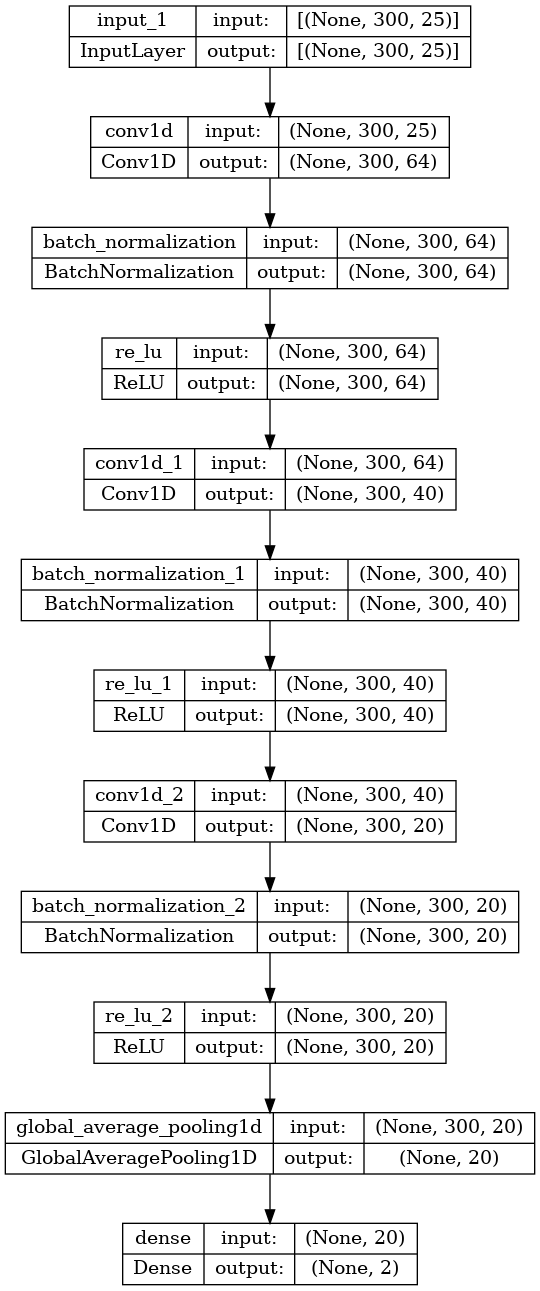

In [21]:
import tensorflow.keras as keras
columns=25
batches=len(Train_Batches)
num_classes=len(np.unique(unieque_names['contains_search_string']))

def make_model(input_shape):
    input_layer = keras.layers.Input([X_train.shape[1],X_train.shape[2]])

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    

    conv2 = keras.layers.Conv1D(filters=40, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=20, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax",bias_initializer=keras.initializers.Constant(30/1100))(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=[X_test.shape[1],X_test.shape[2]])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [22]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="sparse_categorical_crossentropy",
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="sparse_categorical_crossentropy", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="sparse_categorical_crossentropy", patience=50, verbose=1),
]

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
    
)

1D Keras model for feature extraction from timeseries data. Might work well on the clasification algorithm which currently is not doing too well.

## Training the Neural network
Train the autoencoder on 1 batch of data at a time.
This is necceray for 2 reasons.
1. The data has variable lenghts, this cant be stored in a numpy array.
2. If you try to keep all values in memory at once, the RAM overflows and the kernel dies. This way that never happens

In [23]:
y=unieque_names['contains_search_string']
print(y)
print(sum(y))

0       False
1       False
2       False
3       False
4       False
        ...  
1104    False
1105    False
1106    False
1107    False
1108    False
Name: contains_search_string, Length: 1109, dtype: bool
40


In [24]:
y_train=unieque_names[unieque_names[0].isin(Train_Batches)]['contains_search_string'].astype(int)
y_train=y_train.reset_index()
y_train=y_train.drop(['index'],axis=1)

y_test=unieque_names[unieque_names[0].isin(Test_Batches)]['contains_search_string'].astype(int)
y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

print(y_test)

     contains_search_string
0                         0
1                         0
2                         0
3                         0
4                         0
..                      ...
217                       0
218                       0
219                       0
220                       0
221                       0

[222 rows x 1 columns]


In [25]:
#fit the model with the fetched batch
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    validation_split=0.3,
    shuffle=False,
    callbacks=callbacks,
    class_weight=class_weight,
)

Epoch 1/500
20/20 [==============================] - 3s 47ms/step - loss: 0.7685 - sparse_categorical_accuracy: 0.2016 - val_loss: 0.7475 - val_sparse_categorical_accuracy: 0.0674 - lr: 0.0010
Epoch 2/500
20/20 [==============================] - 1s 36ms/step - loss: 0.6663 - sparse_categorical_accuracy: 0.4194 - val_loss: 0.7050 - val_sparse_categorical_accuracy: 0.4906 - lr: 0.0010
Epoch 3/500
20/20 [==============================] - 1s 37ms/step - loss: 0.6267 - sparse_categorical_accuracy: 0.4774 - val_loss: 0.6756 - val_sparse_categorical_accuracy: 0.6517 - lr: 0.0010
Epoch 4/500
20/20 [==============================] - 1s 33ms/step - loss: 0.5836 - sparse_categorical_accuracy: 0.5065 - val_loss: 0.6528 - val_sparse_categorical_accuracy: 0.6891 - lr: 0.0010
Epoch 5/500
20/20 [==============================] - 1s 32ms/step - loss: 0.5550 - sparse_categorical_accuracy: 0.5532 - val_loss: 0.5968 - val_sparse_categorical_accuracy: 0.8577 - lr: 0.0010
Epoch 6/500
20/20 [================

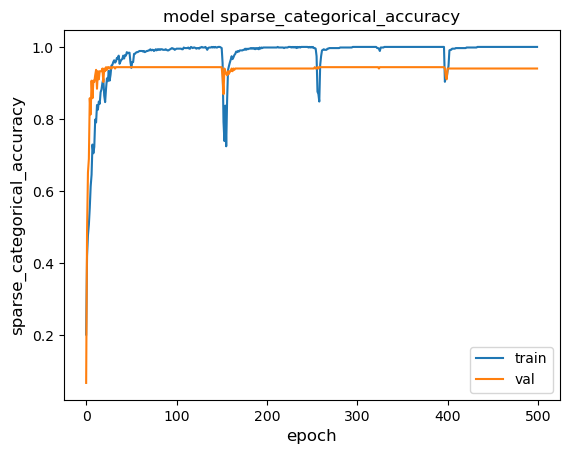

In [26]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

## Calculate

7/7 [==============================] - 0s 10ms/step
Test peformance
[[215   0]
 [  7   0]]


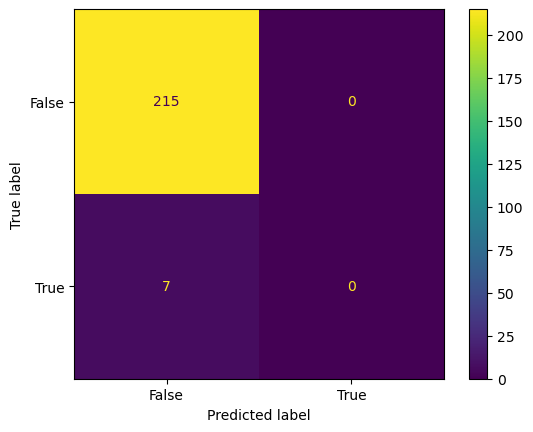

In [27]:
y_pred_ch=model.predict(X_test)
y_pred=y_pred_ch[:,1]>0.5
# print([i for i, x in enumerate(t.tolist()) if x])
# print([i for i, x in enumerate(f.tolist()) if x])

print('Test peformance')
cf=confusion_matrix(y_test,y_pred)

print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

28/28 [==============================] - 0s 9ms/step
Train peformance
[[853   1]
 [ 33   0]]


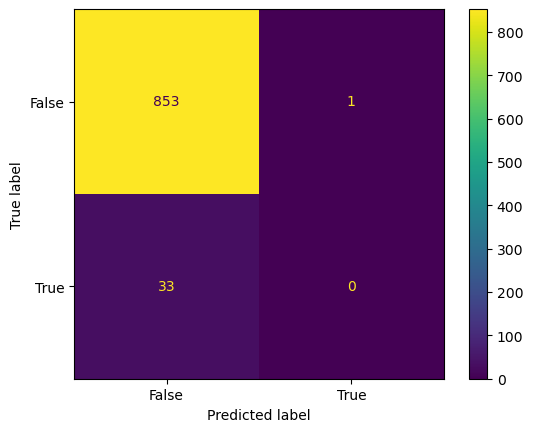

In [28]:
y_fit_ch=model.predict(X_train)
y_fit=y_fit_ch[:,1]>0.5
# print([i for i, x in enumerate(t.tolist()) if x])
# print([i for i, x in enumerate(f.tolist()) if x])

print('Train peformance')
cf=confusion_matrix(y_train,y_fit)

print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()